# this model predicts the price of used cars according to diffrent factors!

importing libraries

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error

1.loading the data

In [216]:
data = pd.read_csv("cars_data.csv")
#the top 5 rows of the df
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## data preprocessing

Exploring the descriptive statistics of the variables

In [217]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [218]:
data = data.drop(['Model'], axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [219]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

removing null values as it is less that 5% of the total data, due to rule of thumb

In [220]:
data = data.dropna(axis = 0)

In [221]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


as shown in count raw, all the counts of the data are the same,

## Visualization

<AxesSubplot:xlabel='Price', ylabel='Density'>

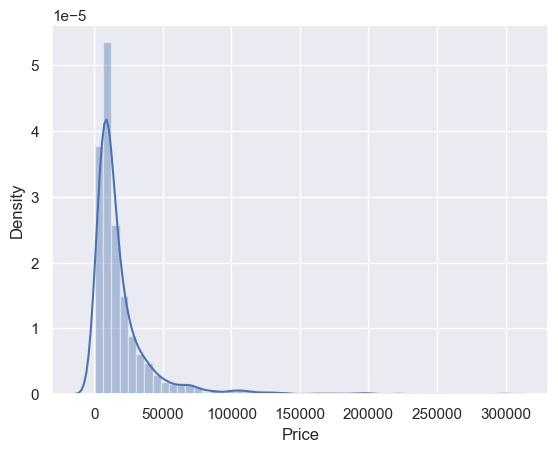

In [222]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data['Price'])

dealing with outliers


In [223]:
q = data['Price'].quantile(0.99)

In [224]:
data_1 = data[data['Price'] <q]

In [225]:
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<AxesSubplot:xlabel='Price', ylabel='Density'>

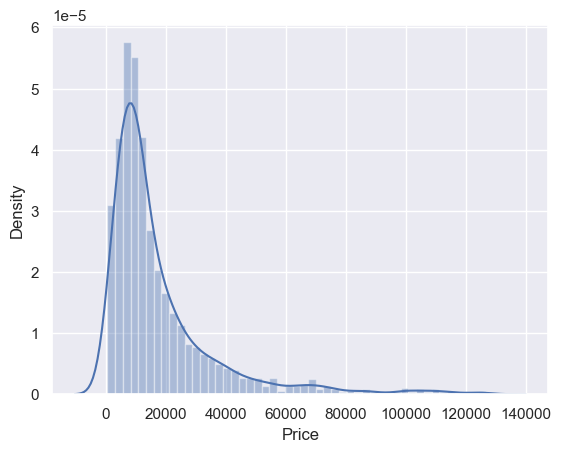

In [226]:
sns.distplot(data_1['Price'])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

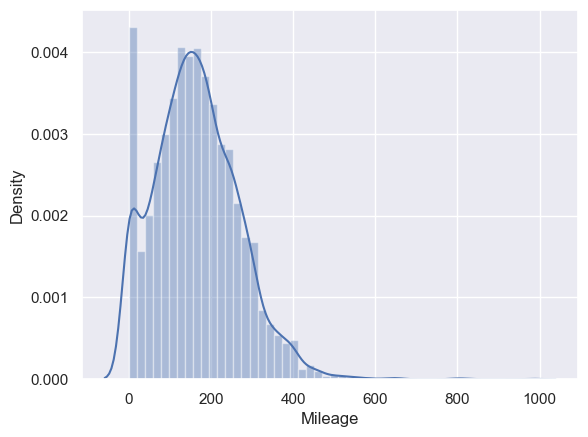

In [227]:
sns.distplot(data_1['Mileage'])

In [228]:
q = data_1['Mileage'].quantile(0.99)

In [229]:
data_2 = data_1[data_1['Mileage']<q]

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

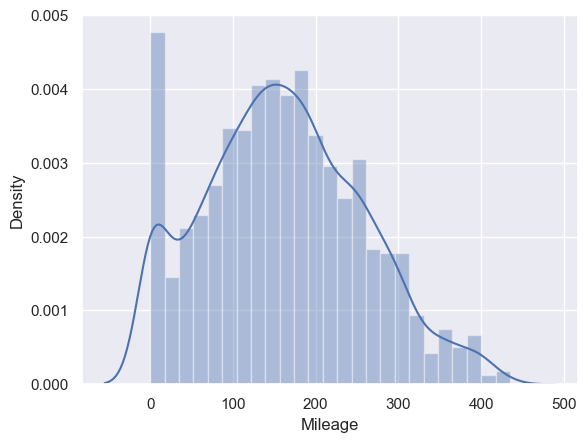

In [230]:
sns.distplot(data_2['Mileage'])

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

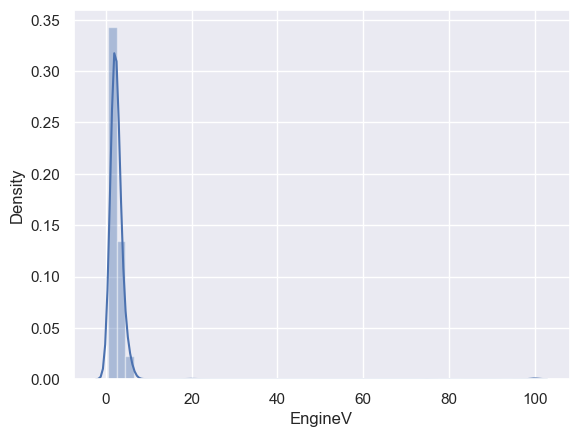

In [231]:
sns.distplot(data_2['EngineV'])

In [232]:
data_3 = data_2[data_2['EngineV']<6.5]

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

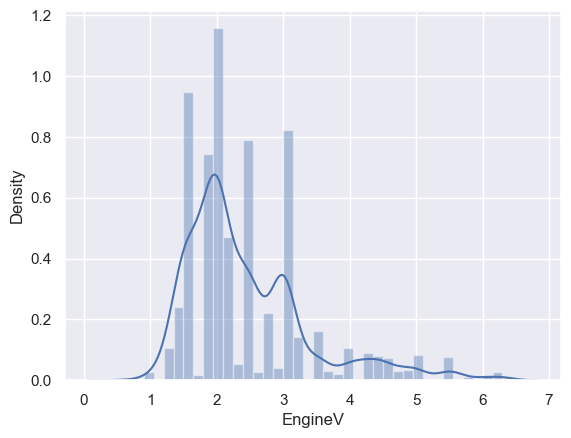

In [233]:
sns.distplot(data_3['EngineV'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

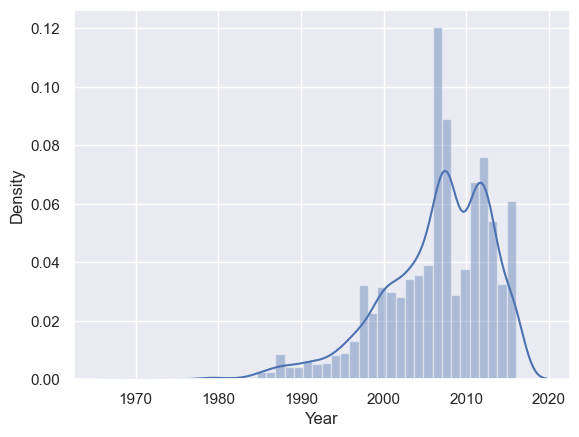

In [234]:
sns.distplot(data_3['Year'])

In [235]:
q = data_3['Year'].quantile(0.1)

In [236]:
#data_4 = data_3[data_3['Year']>1970]
data_4 = data_3[data_3['Year']>1975]


<AxesSubplot:xlabel='Year', ylabel='Density'>

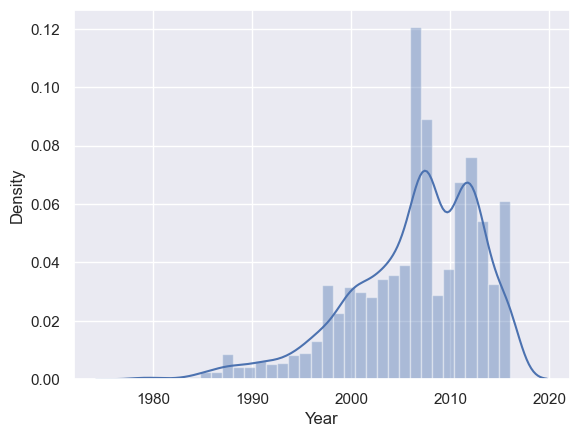

In [237]:
sns.distplot(data_4['Year'])

In [281]:
data = data_4.reset_index(drop=True)

In [239]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3920,3920.000000,3920,3920.000000,3920.000000,3920,3920,3920.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1498,NaN,NaN,1818,3558,NaN
mean,NaN,17984.081878,NaN,161.282653,2.443406,NaN,NaN,2006.415561
std,NaN,19042.148809,NaN,96.080356,0.946302,NaN,NaN,6.569588
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1978.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


## checking ols assumptions

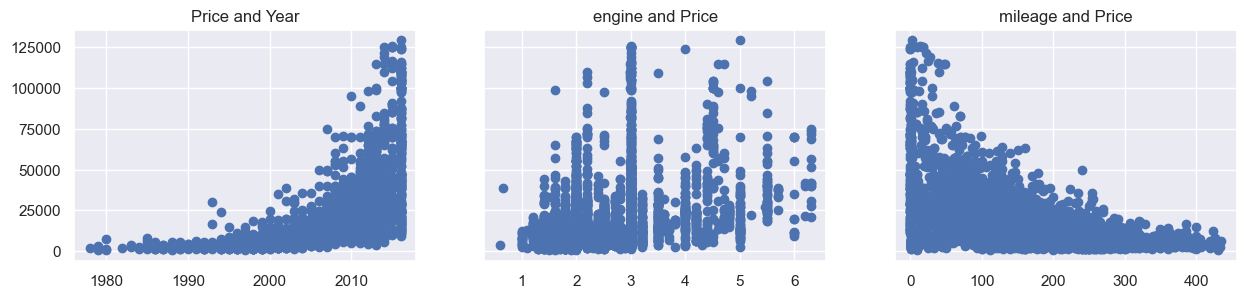

In [286]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True , figsize = (15,3))#sharey -> share 'Price' as y
ax1.scatter(data['Year'] , data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data['EngineV'], data['Price'])
ax2.set_title('engine and Price')
ax3.scatter(data['Mileage'], data['Price'])
ax3.set_title('mileage and Price')
plt.show()

In [287]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data['Price'])
# Then we add it to our data frame
data['log_Price']= log_price
data.head()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


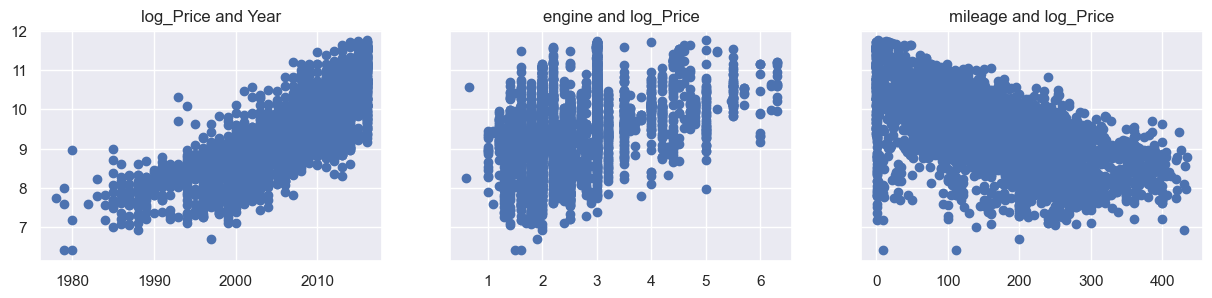

In [242]:
#PLOT WITH LOG OF PRICE
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True , figsize = (15,3))#sharey -> share 'Price' as y
ax1.scatter(data['Year'] , data['log_Price'])
ax1.set_title('log_Price and Year')
ax2.scatter(data['EngineV'], data['log_Price'])
ax2.set_title('engine and log_Price')
ax3.scatter(data['Mileage'], data['log_Price'])
ax3.set_title('mileage and log_Price')
plt.show()


now we can se a liner relationship in all 3 plots

In [289]:
data = data.drop(['Price'], axis = 1)

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3920 non-null   object 
 1   Body          3920 non-null   object 
 2   Mileage       3920 non-null   int64  
 3   EngineV       3920 non-null   float64
 4   Engine Type   3920 non-null   object 
 5   Registration  3920 non-null   object 
 6   Year          3920 non-null   int64  
 7   log_Price     3920 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 245.1+ KB


multicolliniarity check:


In [246]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [247]:
# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data[['Mileage','Year','EngineV']]

In [248]:
vif = pd.DataFrame()

In [291]:
data.shape

(3920, 8)

In [249]:
vif['VIF'] = [variance_inflation_factor(variables.values, i ) for i in range(variables.shape[1])]

In [250]:
vif['Features'] = variables.columns

In [251]:
vif

,VIF,Features
0,3.790463,Mileage
1,10.394632,Year
2,7.669290,EngineV


### VIF values below 5 generally indicate a low risk of multicollinearity.
### VIF values between 5 and 10 suggest a moderate level of multicollinearity.
### VIF values above 10 indicate a high risk of multicollinearity.

In [252]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data.drop(['Year'],axis=1)

create dummy variables
to preprocess all categorical features

In [253]:
data_dummy = pd.get_dummies(data_no_multicollinearity,drop_first = True)

In [254]:
data_dummy

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3916,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3917,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3918,194,2.0,8.987197,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [255]:
variables_dummy = data_dummy[['Brand_BMW' , 'Brand_Mercedes-Benz' , 'Brand_Mitsubishi', 'Brand_Renault' , 'Brand_Toyota' , 'Brand_Volkswagen']]
vif_dummy = pd.DataFrame()

In [256]:
vif_dummy['VIF'] = [variance_inflation_factor(variables_dummy.values, i ) for i in range(variables_dummy.shape[1])]

In [257]:
vif_dummy['Features'] = variables_dummy.columns

In [258]:
vif_dummy

,VIF,Features
0,0.187302,Brand_BMW
1,0.000000,Brand_Mercedes-Benz
2,0.160656,Brand_Mitsubishi
3,0.412844,Brand_Renault
4,0.491054,Brand_Toyota
5,0.109049,Brand_Volkswagen


In [259]:
data_dummy.columns.values

array(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [260]:
cols = ['log_Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [261]:
final_data = data_dummy[cols]

In [262]:
final_data

,log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3916,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3917,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3918,8.987197,194,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# linear regression model 

In [263]:
#target is log price
target = final_data['log_Price']
inputs = final_data.drop(['log_Price'], axis = 1)

scaling the data


In [292]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
# x-mean/std
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.fit_transform(inputs)

train, test 

In [266]:
# Import the module for the split
from sklearn.model_selection import train_test_split

In [267]:
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,target,test_size = 0.2,random_state=365)

create the regression

In [268]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [269]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

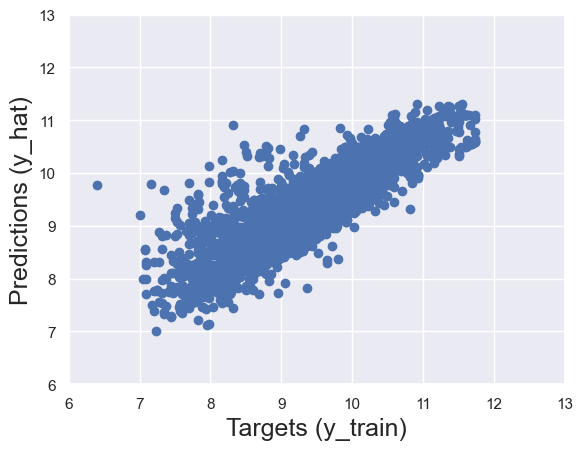

In [270]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train,y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

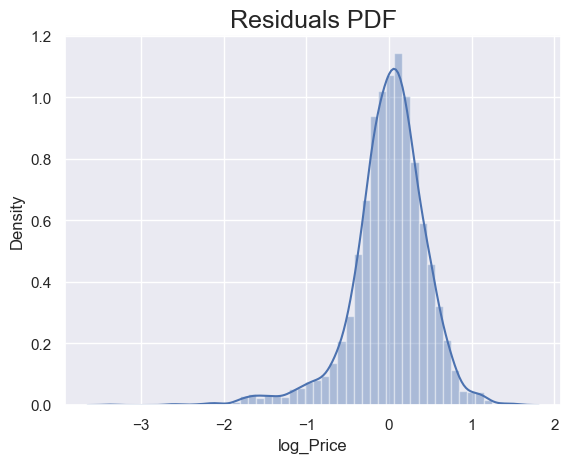

In [271]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [296]:
train_mae = mean_absolute_error(y_train, y_hat)

train_rmse = np.sqrt(mean_squared_error(y_train, y_hat))

print(f'Training MAE: {train_mae}')

print(f'Training RMSE: {train_rmse}')

Training MAE: 0.32719184159084685
Training RMSE: 0.455170850426873


In [297]:
test_y_hat = reg.predict(x_test)

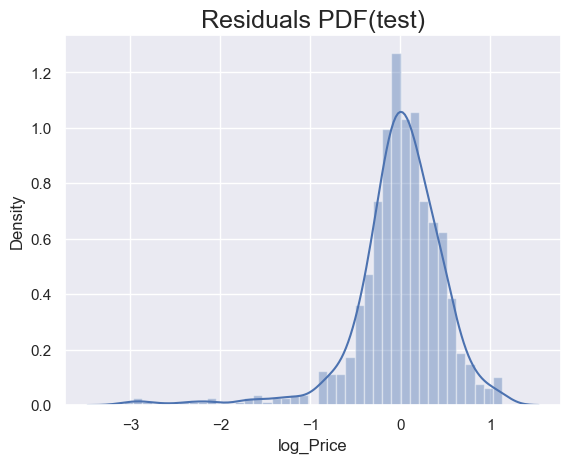

In [298]:
sns.distplot(y_test - test_y_hat)
plt.title("Residuals PDF(test)", size=18)
plt.show()

In [299]:
test_mae = mean_absolute_error(y_test, test_y_hat)
test_rmse = np.sqrt(mean_squared_error(y_test, test_y_hat))
print(f'Test MAE: {test_mae}')
print(f'Test RMSE: {test_rmse}')

Test MAE: 0.3414457177709396
Test RMSE: 0.5105219977941658


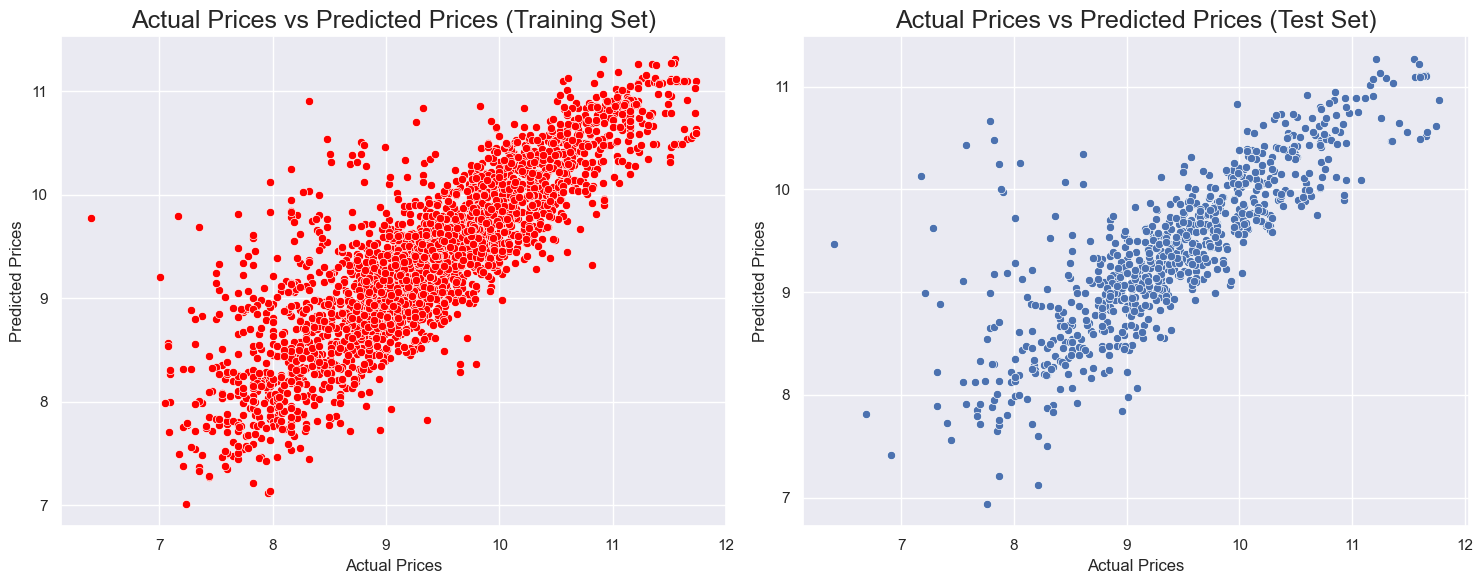

In [310]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_hat, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Training Set)", size=(18))

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=test_y_hat)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Test Set)", size=(18))

plt.tight_layout()
plt.show()

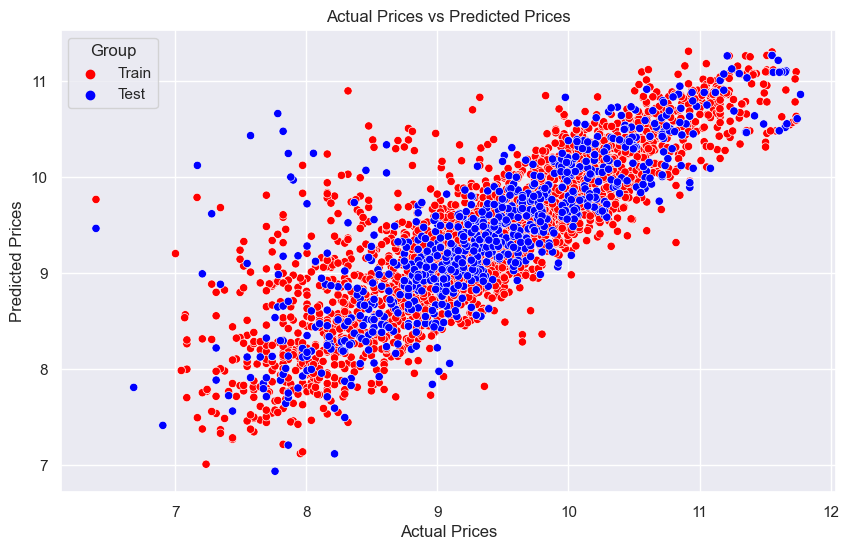

In [304]:
df_train = pd.DataFrame({'Actual Prices': y_train, 'Predicted Prices': y_hat, 'Group': 'Train'})
df_test = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': test_y_hat, 'Group': 'Test'})

df = pd.concat([df_train, df_test])

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='Actual Prices', y='Predicted Prices', hue='Group', palette={'Train': 'red', 'Test': 'blue'}, data=df, ax=ax)

ax.set_xlabel("Actual Prices")
ax.set_ylabel("Predicted Prices")
ax.set_title("Actual Prices vs Predicted Prices")

plt.show()

In [273]:
inputs.columns

Index(['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [274]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3916,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3917,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3918,194,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [275]:
x_new = pd.DataFrame({'Mileage':[99] ,'EngineV':[2.5] , 'Brand_BMW' : [0],'Brand_Mercedes-Benz': [1] ,'Brand_Mitsubishi':[0],
'Brand_Renault':[0],'Brand_Toyota': [0]  , 'Brand_Volkswagen':[0]  , 'Body_hatch' :[0] , 'Body_other': [0] , 'Body_sedan':[1] ,
'Body_vagon':[0] , 'Body_van':[0] , 'Engine Type_Gas' :[1],
'Engine Type_Other':[0], 'Engine Type_Petrol':[0], 'Registration_yes':[1] })

In [276]:
x_new

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,99,2.5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1


In [311]:
x_scaled = scaler.fit_transform(x_new)

In [313]:
y_pred = reg.predict(x_scaled)
print(np.exp(y_pred))

[12022.86745248]


# the prediction for such a car is 12,022 USD

In [314]:
y_pred

array([9.39456574])

In [315]:
'''import joblib
joblib.dump(reg, 'model.pkl') '''

['model.pkl']